In [1]:
import pandas as pd 
from sklearn.decomposition import KernelPCA 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import plotly.express as px
import nbformat
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap
from reg_resampler import resampler
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from imblearn.combine import SMOTEENN

##### Loading Expanded Data Set 

Data Extraction script, used to extract 8,500 features from the amino acid sequence can be found in the notebook called "protlearn.ipynb"

In [2]:
expanded_data = pd.read_csv("data/new_all_features2.csv")

In [3]:
expanded_data

Unnamed: 0  OBSERVATION                                ORGANISM  \
0              0            9                    Candida parapsilosis   
1              1           15                    Picrophilus torridus   
2              2           16              Saccharolobus solfataricus   
3              3           17                      Haloferax volcanii   
4              4           18                Pyrobaculum calidifontis   
...          ...          ...                                     ...   
9560        9560        30613                        Escherichia coli   
9561        9561        30614              Thiobacillus denitrificans   
9562        9562        30615  Escherichia coli P06609 AND P06611 AND   
9563        9563        30616                            Homo sapiens   
9564        9564        30619                       Bacillus subtilis   

      TEMPERATURE OPTIMUM UNIPROT EC Number    EXACT  \
0                    35.0  B2KJ46   1.1.1.1  optimal   
1                    83.0  Q6L0S1   1.1.1.1  optimal   
2                    80.0  P39462   1.1.1.1  optimal   
3                    80.0  D4GSN2   1.1.1.1  optimal   
4                    80.0  A3MVR8   1.1.1.1  optimal   
...                   ...     ...       ...      ...   
9560                 22.0  P06611   7.6.2.8  optimal   
9561                 22.0  Q3SFD8   7.6.2.8  optimal   
9562                 22.0  P37028   7.6.2.8  optimal   
9563                 37.0  O14678   7.6.2.8  optimal   
9564                 22.0  P46920   7.6.2.9  optimal   

                                               SEQUENCE         A         C  \
0     MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...  0.093190  0.017921   
1     MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...  0.063091  0.009464   
2     MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...  0.097983  0.014409   
3     MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...  0.130312  0.028329   
4     MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...  0.083333  0.017241   
...                                                 ...       ...       ...   
9560  MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...  0.108434  0.004016   
9561  MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...  0.136364  0.005051   
9562  MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...  0.116541  0.007519   
9563  MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...  0.047855  0.013201   
9564  MSVDEKPIKIKVEKVSKIFGKQTKKAVQMLANGKTKKEILKATGST...  0.064593  0.000000   

      ...     d21.1     d22.1     d23.1     d24.1     d25.1     d26.1  \
0     ...  0.033836  0.031867  0.033830  0.031876  0.030197  0.033369   
1     ...  0.031418  0.031556  0.033632  0.030897  0.031789  0.032282   
2     ...  0.034026  0.029863  0.033804  0.032413  0.031012  0.032000   
3     ...  0.035015  0.032300  0.033928  0.033032  0.030483  0.032307   
4     ...  0.031395  0.031993  0.033432  0.031316  0.031943  0.029474   
...   ...       ...       ...       ...       ...       ...       ...   
9560  ...  0.032554  0.032789  0.033764  0.030094  0.029987  0.032062   
9561  ...  0.031286  0.031456  0.033371  0.031253  0.031196  0.032865   
9562  ...  0.031383  0.030835  0.033921  0.031157  0.030035  0.033989   
9563  ...  0.034319  0.033141  0.031993  0.030978  0.034058  0.032746   
9564  ...  0.031425  0.032000  0.032405  0.034212  0.033755  0.031406   

         d27.1     d28.1     d29.1     d30.1  
0     0.032534  0.028335  0.032076  0.032111  
1     0.032068  0.031340  0.032466  0.032929  
2     0.033222  0.030910  0.031784  0.033489  
3     0.031558  0.030267  0.032947  0.031946  
4     0.032667  0.033449  0.031992  0.034449  
...        ...       ...       ...       ...  
9560  0.031501  0.029819  0.031229  0.031287  
9561  0.027629  0.030695  0.029946  0.031352  
9562  0.034441  0.031213  0.032455  0.032272  
9563  0.031105  0.032739  0.032919  0.032320  
9564  0.032981  0.032251  0.031627  0.031377  

[9565 rows x 9977 columns]

In [4]:
def temp_range_to_no(value):
    if value <= 20:
        return 0
    elif value <= 40 and value > 20:
        return 1
    elif value <= 60 and value > 40:
        return 2
    elif value <= 80 and value > 60:
        return 3
    else:
        return 4

In [5]:
temp = expanded_data["TEMPERATURE OPTIMUM"]
fig = px.box(expanded_data,y="TEMPERATURE OPTIMUM",points="all")
fig.show()

In [6]:
null_percentage = expanded_data.isnull().sum()/expanded_data.shape[0]*100

col_to_drop = null_percentage[null_percentage>60].keys()

output_df = expanded_data.drop(col_to_drop, axis=1)
output_df

Unnamed: 0  OBSERVATION                                ORGANISM  \
0              0            9                    Candida parapsilosis   
1              1           15                    Picrophilus torridus   
2              2           16              Saccharolobus solfataricus   
3              3           17                      Haloferax volcanii   
4              4           18                Pyrobaculum calidifontis   
...          ...          ...                                     ...   
9560        9560        30613                        Escherichia coli   
9561        9561        30614              Thiobacillus denitrificans   
9562        9562        30615  Escherichia coli P06609 AND P06611 AND   
9563        9563        30616                            Homo sapiens   
9564        9564        30619                       Bacillus subtilis   

      TEMPERATURE OPTIMUM UNIPROT EC Number    EXACT  \
0                    35.0  B2KJ46   1.1.1.1  optimal   
1                    83.0  Q6L0S1   1.1.1.1  optimal   
2                    80.0  P39462   1.1.1.1  optimal   
3                    80.0  D4GSN2   1.1.1.1  optimal   
4                    80.0  A3MVR8   1.1.1.1  optimal   
...                   ...     ...       ...      ...   
9560                 22.0  P06611   7.6.2.8  optimal   
9561                 22.0  Q3SFD8   7.6.2.8  optimal   
9562                 22.0  P37028   7.6.2.8  optimal   
9563                 37.0  O14678   7.6.2.8  optimal   
9564                 22.0  P46920   7.6.2.9  optimal   

                                               SEQUENCE         A         C  \
0     MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...  0.093190  0.017921   
1     MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...  0.063091  0.009464   
2     MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...  0.097983  0.014409   
3     MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...  0.130312  0.028329   
4     MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...  0.083333  0.017241   
...                                                 ...       ...       ...   
9560  MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...  0.108434  0.004016   
9561  MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...  0.136364  0.005051   
9562  MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...  0.116541  0.007519   
9563  MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...  0.047855  0.013201   
9564  MSVDEKPIKIKVEKVSKIFGKQTKKAVQMLANGKTKKEILKATGST...  0.064593  0.000000   

      ...     d21.1     d22.1     d23.1     d24.1     d25.1     d26.1  \
0     ...  0.033836  0.031867  0.033830  0.031876  0.030197  0.033369   
1     ...  0.031418  0.031556  0.033632  0.030897  0.031789  0.032282   
2     ...  0.034026  0.029863  0.033804  0.032413  0.031012  0.032000   
3     ...  0.035015  0.032300  0.033928  0.033032  0.030483  0.032307   
4     ...  0.031395  0.031993  0.033432  0.031316  0.031943  0.029474   
...   ...       ...       ...       ...       ...       ...       ...   
9560  ...  0.032554  0.032789  0.033764  0.030094  0.029987  0.032062   
9561  ...  0.031286  0.031456  0.033371  0.031253  0.031196  0.032865   
9562  ...  0.031383  0.030835  0.033921  0.031157  0.030035  0.033989   
9563  ...  0.034319  0.033141  0.031993  0.030978  0.034058  0.032746   
9564  ...  0.031425  0.032000  0.032405  0.034212  0.033755  0.031406   

         d27.1     d28.1     d29.1     d30.1  
0     0.032534  0.028335  0.032076  0.032111  
1     0.032068  0.031340  0.032466  0.032929  
2     0.033222  0.030910  0.031784  0.033489  
3     0.031558  0.030267  0.032947  0.031946  
4     0.032667  0.033449  0.031992  0.034449  
...        ...       ...       ...       ...  
9560  0.031501  0.029819  0.031229  0.031287  
9561  0.027629  0.030695  0.029946  0.031352  
9562  0.034441  0.031213  0.032455  0.032272  
9563  0.031105  0.032739  0.032919  0.032320  
9564  0.032981  0.032251  0.031627  0.031377  

[9565 rows x 9977 columns]

In [7]:
data = output_df.dropna()
data

Unnamed: 0  OBSERVATION                                ORGANISM  \
0              0            9                    Candida parapsilosis   
1              1           15                    Picrophilus torridus   
2              2           16              Saccharolobus solfataricus   
3              3           17                      Haloferax volcanii   
4              4           18                Pyrobaculum calidifontis   
...          ...          ...                                     ...   
9560        9560        30613                        Escherichia coli   
9561        9561        30614              Thiobacillus denitrificans   
9562        9562        30615  Escherichia coli P06609 AND P06611 AND   
9563        9563        30616                            Homo sapiens   
9564        9564        30619                       Bacillus subtilis   

      TEMPERATURE OPTIMUM UNIPROT EC Number    EXACT  \
0                    35.0  B2KJ46   1.1.1.1  optimal   
1                    83.0  Q6L0S1   1.1.1.1  optimal   
2                    80.0  P39462   1.1.1.1  optimal   
3                    80.0  D4GSN2   1.1.1.1  optimal   
4                    80.0  A3MVR8   1.1.1.1  optimal   
...                   ...     ...       ...      ...   
9560                 22.0  P06611   7.6.2.8  optimal   
9561                 22.0  Q3SFD8   7.6.2.8  optimal   
9562                 22.0  P37028   7.6.2.8  optimal   
9563                 37.0  O14678   7.6.2.8  optimal   
9564                 22.0  P46920   7.6.2.9  optimal   

                                               SEQUENCE         A         C  \
0     MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...  0.093190  0.017921   
1     MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...  0.063091  0.009464   
2     MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...  0.097983  0.014409   
3     MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...  0.130312  0.028329   
4     MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...  0.083333  0.017241   
...                                                 ...       ...       ...   
9560  MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...  0.108434  0.004016   
9561  MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...  0.136364  0.005051   
9562  MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...  0.116541  0.007519   
9563  MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...  0.047855  0.013201   
9564  MSVDEKPIKIKVEKVSKIFGKQTKKAVQMLANGKTKKEILKATGST...  0.064593  0.000000   

      ...     d21.1     d22.1     d23.1     d24.1     d25.1     d26.1  \
0     ...  0.033836  0.031867  0.033830  0.031876  0.030197  0.033369   
1     ...  0.031418  0.031556  0.033632  0.030897  0.031789  0.032282   
2     ...  0.034026  0.029863  0.033804  0.032413  0.031012  0.032000   
3     ...  0.035015  0.032300  0.033928  0.033032  0.030483  0.032307   
4     ...  0.031395  0.031993  0.033432  0.031316  0.031943  0.029474   
...   ...       ...       ...       ...       ...       ...       ...   
9560  ...  0.032554  0.032789  0.033764  0.030094  0.029987  0.032062   
9561  ...  0.031286  0.031456  0.033371  0.031253  0.031196  0.032865   
9562  ...  0.031383  0.030835  0.033921  0.031157  0.030035  0.033989   
9563  ...  0.034319  0.033141  0.031993  0.030978  0.034058  0.032746   
9564  ...  0.031425  0.032000  0.032405  0.034212  0.033755  0.031406   

         d27.1     d28.1     d29.1     d30.1  
0     0.032534  0.028335  0.032076  0.032111  
1     0.032068  0.031340  0.032466  0.032929  
2     0.033222  0.030910  0.031784  0.033489  
3     0.031558  0.030267  0.032947  0.031946  
4     0.032667  0.033449  0.031992  0.034449  
...        ...       ...       ...       ...  
9560  0.031501  0.029819  0.031229  0.031287  
9561  0.027629  0.030695  0.029946  0.031352  
9562  0.034441  0.031213  0.032455  0.032272  
9563  0.031105  0.032739  0.032919  0.032320  
9564  0.032981  0.032251  0.031627  0.031377  

[9502 rows x 9977 columns]

In [8]:
expanded_data = data

In [9]:
expanded_data['range'] = expanded_data["TEMPERATURE OPTIMUM"].apply(temp_range_to_no)

C:\Users\venka\AppData\Local\Temp\ipykernel_25080\455337862.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
expanded_data

Unnamed: 0  OBSERVATION                                ORGANISM  \
0              0            9                    Candida parapsilosis   
1              1           15                    Picrophilus torridus   
2              2           16              Saccharolobus solfataricus   
3              3           17                      Haloferax volcanii   
4              4           18                Pyrobaculum calidifontis   
...          ...          ...                                     ...   
9560        9560        30613                        Escherichia coli   
9561        9561        30614              Thiobacillus denitrificans   
9562        9562        30615  Escherichia coli P06609 AND P06611 AND   
9563        9563        30616                            Homo sapiens   
9564        9564        30619                       Bacillus subtilis   

      TEMPERATURE OPTIMUM UNIPROT EC Number    EXACT  \
0                    35.0  B2KJ46   1.1.1.1  optimal   
1                    83.0  Q6L0S1   1.1.1.1  optimal   
2                    80.0  P39462   1.1.1.1  optimal   
3                    80.0  D4GSN2   1.1.1.1  optimal   
4                    80.0  A3MVR8   1.1.1.1  optimal   
...                   ...     ...       ...      ...   
9560                 22.0  P06611   7.6.2.8  optimal   
9561                 22.0  Q3SFD8   7.6.2.8  optimal   
9562                 22.0  P37028   7.6.2.8  optimal   
9563                 37.0  O14678   7.6.2.8  optimal   
9564                 22.0  P46920   7.6.2.9  optimal   

                                               SEQUENCE         A         C  \
0     MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...  0.093190  0.017921   
1     MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...  0.063091  0.009464   
2     MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...  0.097983  0.014409   
3     MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...  0.130312  0.028329   
4     MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...  0.083333  0.017241   
...                                                 ...       ...       ...   
9560  MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...  0.108434  0.004016   
9561  MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...  0.136364  0.005051   
9562  MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...  0.116541  0.007519   
9563  MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...  0.047855  0.013201   
9564  MSVDEKPIKIKVEKVSKIFGKQTKKAVQMLANGKTKKEILKATGST...  0.064593  0.000000   

      ...     d22.1     d23.1     d24.1     d25.1     d26.1     d27.1  \
0     ...  0.031867  0.033830  0.031876  0.030197  0.033369  0.032534   
1     ...  0.031556  0.033632  0.030897  0.031789  0.032282  0.032068   
2     ...  0.029863  0.033804  0.032413  0.031012  0.032000  0.033222   
3     ...  0.032300  0.033928  0.033032  0.030483  0.032307  0.031558   
4     ...  0.031993  0.033432  0.031316  0.031943  0.029474  0.032667   
...   ...       ...       ...       ...       ...       ...       ...   
9560  ...  0.032789  0.033764  0.030094  0.029987  0.032062  0.031501   
9561  ...  0.031456  0.033371  0.031253  0.031196  0.032865  0.027629   
9562  ...  0.030835  0.033921  0.031157  0.030035  0.033989  0.034441   
9563  ...  0.033141  0.031993  0.030978  0.034058  0.032746  0.031105   
9564  ...  0.032000  0.032405  0.034212  0.033755  0.031406  0.032981   

         d28.1     d29.1     d30.1  range  
0     0.028335  0.032076  0.032111      1  
1     0.031340  0.032466  0.032929      4  
2     0.030910  0.031784  0.033489      3  
3     0.030267  0.032947  0.031946      3  
4     0.033449  0.031992  0.034449      3  
...        ...       ...       ...    ...  
9560  0.029819  0.031229  0.031287      1  
9561  0.030695  0.029946  0.031352      1  
9562  0.031213  0.032455  0.032272      1  
9563  0.032739  0.032919  0.032320      1  
9564  0.032251  0.031627  0.031377      1  

[9502 rows x 9978 columns]

In [11]:
expanded_data['range']

0       1
1       4
2       3
3       3
4       3
       ..
9560    1
9561    1
9562    1
9563    1
9564    1
Name: range, Length: 9502, dtype: int64

In [12]:
output_d = expanded_data["range"]

In [13]:
output_d.value_counts()

1    6226
2    1849
3     865
4     361
0     201
Name: range, dtype: int64

In [13]:
input_d = expanded_data.drop(columns = ["OBSERVATION","ORGANISM","UNIPROT","EC Number",
                                        "EXACT","SEQUENCE","range","TEMPERATURE OPTIMUM"])

In [14]:
unnamed_cols  =  input_d.columns.str.contains('Unnamed')
input_d = input_d.drop(input_d[input_d.columns[unnamed_cols]], axis=1)

In [15]:
input_d

A         C         D         E         F         G         H  \
0     0.093190  0.017921  0.057348  0.046595  0.025090  0.089606  0.017921   
1     0.063091  0.009464  0.053628  0.063091  0.031546  0.104101  0.012618   
2     0.097983  0.014409  0.043228  0.072046  0.017291  0.100865  0.020173   
3     0.130312  0.028329  0.087819  0.062323  0.014164  0.107649  0.033994   
4     0.083333  0.017241  0.037356  0.074713  0.025862  0.123563  0.031609   
...        ...       ...       ...       ...       ...       ...       ...   
9560  0.108434  0.004016  0.040161  0.040161  0.012048  0.084337  0.040161   
9561  0.136364  0.005051  0.030303  0.010101  0.065657  0.085859  0.025253   
9562  0.116541  0.007519  0.041353  0.045113  0.030075  0.048872  0.000000   
9563  0.047855  0.013201  0.049505  0.052805  0.052805  0.072607  0.016502   
9564  0.064593  0.000000  0.074163  0.076555  0.028708  0.071770  0.011962   

             I         K         L  ...     d21.1     d22.1     d23.1  \
0     0.075269  0.078853  0.064516  ...  0.033836  0.031867  0.033830   
1     0.123028  0.069401  0.082019  ...  0.031418  0.031556  0.033632   
2     0.069164  0.066282  0.092219  ...  0.034026  0.029863  0.033804   
3     0.016997  0.005666  0.084986  ...  0.035015  0.032300  0.033928   
4     0.063218  0.060345  0.077586  ...  0.031395  0.031993  0.033432   
...        ...       ...       ...  ...       ...       ...       ...   
9560  0.036145  0.032129  0.156627  ...  0.032554  0.032789  0.033764   
9561  0.040404  0.005051  0.161616  ...  0.031286  0.031456  0.033371   
9562  0.071429  0.052632  0.097744  ...  0.031383  0.030835  0.033921   
9563  0.052805  0.037954  0.151815  ...  0.034319  0.033141  0.031993   
9564  0.081340  0.086124  0.100478  ...  0.031425  0.032000  0.032405   

         d24.1     d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  
0     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1     0.030897  0.031789  0.032282  0.032068  0.031340  0.032466  0.032929  
2     0.032413  0.031012  0.032000  0.033222  0.030910  0.031784  0.033489  
3     0.033032  0.030483  0.032307  0.031558  0.030267  0.032947  0.031946  
4     0.031316  0.031943  0.029474  0.032667  0.033449  0.031992  0.034449  
...        ...       ...       ...       ...       ...       ...       ...  
9560  0.030094  0.029987  0.032062  0.031501  0.029819  0.031229  0.031287  
9561  0.031253  0.031196  0.032865  0.027629  0.030695  0.029946  0.031352  
9562  0.031157  0.030035  0.033989  0.034441  0.031213  0.032455  0.032272  
9563  0.030978  0.034058  0.032746  0.031105  0.032739  0.032919  0.032320  
9564  0.034212  0.033755  0.031406  0.032981  0.032251  0.031627  0.031377  

[9502 rows x 9969 columns]

In [19]:
input_d.columns

Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
       ...
       'd21.1', 'd22.1', 'd23.1', 'd24.1', 'd25.1', 'd26.1', 'd27.1', 'd28.1',
       'd29.1', 'd30.1'],
      dtype='object', length=9969)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
  
# transform data
input_std = scaler.fit_transform(input_d)

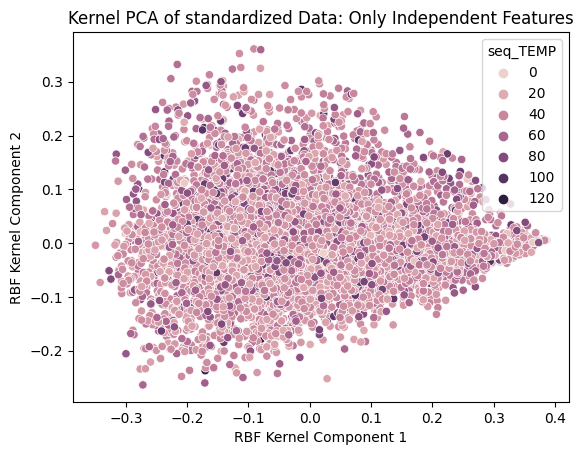

In [21]:
kpca = KernelPCA(n_components=2, kernel='rbf')
x_kpca = kpca.fit_transform(input_std)


x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = expanded_data["TEMPERATURE OPTIMUM"]

# Create cool scatter plot
fig = sns.scatterplot(x=x_tx[0], y=x_tx[1],
                hue=x_tx['seq_TEMP'])
plt.xlabel("RBF Kernel Component 1")
plt.ylabel("RBF Kernel Component 2")
plt.title("Kernel PCA of standardized Data: Only Independent Features")
plt.show(fig)

In [22]:
kpca = KernelPCA(n_components=3, kernel='rbf')
x_kpca = kpca.fit_transform(input_std)


x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = expanded_data["TEMPERATURE OPTIMUM"]

fig = px.scatter_3d(x_tx, x=0, y=1, z=2,
              color='seq_TEMP')

fig.show()


In [22]:
print(input_d.columns)

Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
       ...
       'd21.1', 'd22.1', 'd23.1', 'd24.1', 'd25.1', 'd26.1', 'd27.1', 'd28.1',
       'd29.1', 'd30.1'],
      dtype='object', length=9969)


In [23]:
input_d.dtypes

A        float64
C        float64
D        float64
E        float64
F        float64
          ...   
d26.1    float64
d27.1    float64
d28.1    float64
d29.1    float64
d30.1    float64
Length: 9969, dtype: object

In [27]:
data_xgb =  pd.DataFrame(input_std)
data_xgb_y = output_d

In [28]:
output_d

0       1
1       4
2       3
3       3
4       3
       ..
9560    1
9561    1
9562    1
9563    1
9564    1
Name: range, Length: 9502, dtype: int64

In [ ]:
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',             # Gradient boosting type
    'objective': 'multiclass',           # Objective function for multiclass classification
    'metric': 'multi_logloss',           # Evaluation metric for multiclass classification
    'num_classes': 5,                    # Number of classes in the target variable
    'num_leaves': 31,                    # Maximum number of leaves in one tree
    'learning_rate': 0.1,                # Learning rate
    'feature_fraction': 0.5,             # Percentage of features used per iteration
    'bagging_fraction': 0.5,             # Percentage of data used per iteration
    'bagging_freq': 5,                   # Frequency for bagging
    'verbose': 0,                        # Verbosity of printing messages
    'max_depth': 8,                      # Maximum depth of tree (-1 means no limit)
    'min_child_samples': 20,             # Minimum number of data points required in a leaf
    'reg_lambda': 5,                     # L2 regularization term on weights
    'reg_alpha': 5,                      # L1 regularization term on weights
}

# Train the LightGBM classifier
model_lgb_c = lgb.LGBMClassifier(**params)

In [29]:
params = {
    'boosting_type': 'gbdt',    # Gradient boosting type
    'objective': 'regression',  # Objective function for regression
    'metric': 'rmse',           # Evaluation metric
    'learning_rate': 0.1,       # Learning rate
    'num_leaves': 31,           # Maximum number of leaves in one tree
    'max_depth': 8,             # Maximum depth of tree (-1 means no limit)
    'min_child_samples': 20,    # Minimum number of data points required in a leaf
    'subsample': 0.5,           # Subsample ratio of the training instances
    'colsample_bytree': 0.3,    # Subsample ratio of columns when constructing each tree
    'reg_lambda': 5,            # L2 regularization term on weights
    'reg_alpha': 5,             # L1 regularization term on weights
    'n_estimators': 1000,       # Number of boosting iterations
    'random_state': 42          # Random seed for reproducibility
}

# Create a LightGBM model with the specified hyperparameters
model_lgb_r = lgb.LGBMRegressor(**params)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.2, random_state=42)

In [31]:
X, y = X_train, y_train
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train = pd.DataFrame(X)
y_train = y

In [32]:
kpca = KernelPCA(n_components=3, kernel='rbf')
x_kpca = kpca.fit_transform(X_train)


x_tx = x_kpca
x_tx =pd.DataFrame(x_tx)
x_tx["seq_TEMP"] = expanded_data["TEMPERATURE OPTIMUM"]

fig = px.scatter_3d(x_tx, x=0, y=1, z=2,
              color='seq_TEMP')

fig.show()


In [33]:
x_tx

0         1         2  seq_TEMP
0     -0.040258 -0.003308 -0.056061      35.0
1      0.138077  0.007013  0.012296      83.0
2      0.211343  0.051790  0.036215      80.0
3     -0.022047 -0.054388 -0.041282      80.0
4      0.167294  0.019869  0.025522      80.0
...         ...       ...       ...       ...
24945 -0.164130  0.047746  0.096520       NaN
24946  0.121065  0.022070  0.043421       NaN
24947 -0.185195  0.032675  0.062104       NaN
24948  0.021462  0.024878  0.070470       NaN
24949  0.015427  0.043935  0.075243       NaN

[24950 rows x 4 columns]

In [36]:
x_tx[0]

0       -0.040258
1        0.138077
2        0.211343
3       -0.022047
4        0.167294
           ...   
24945   -0.164130
24946    0.121065
24947   -0.185195
24948    0.021462
24949    0.015427
Name: 0, Length: 24950, dtype: float64

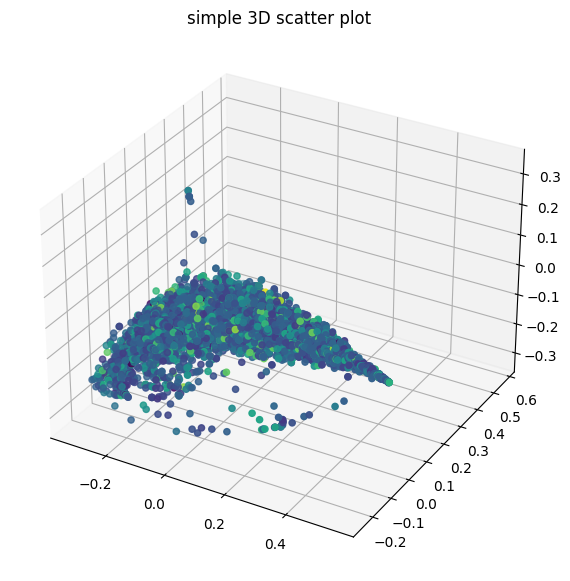

In [41]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x_tx[0], x_tx[1], x_tx[2], c= x_tx["seq_TEMP"], cmap = 'viridis')
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [42]:
X_train = pd.DataFrame(X_train)
X_train.columns = data_xgb.columns
X_test = pd.DataFrame(X_test)
X_test.columns = data_xgb.columns
model_lgb_c.fit(X_train,y_train,eval_set=[(X_test, y_test)],early_stopping_rounds=10)

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15:19:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 0 pruned nodes, max_depth=10
[15:19:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 612 extra nodes, 0 pruned nodes, max_depth=10
[15:19:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 346 extra nodes, 0 pruned nodes, max_depth=10
[15:19:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 388 extra nodes, 0 pruned nodes, max_depth=10
[15:19:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['auc', 'merror'], feature_types=None, gamma=0,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [96]:
auc_metric = []
m_error = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.2, random_state=i)
    X, y = X_train, y_train
    y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    X_train = pd.DataFrame(X)
    y_train = y

    X_train = pd.DataFrame(X_train)

    X_train.columns = data_xgb.columns
    X_test = pd.DataFrame(X_test)
    X_test.columns = data_xgb.columns
    model_lgb_c.fit(X_train,y_train,eval_set=[(X_test, y_test)],early_stopping_rounds=10)

    auc_scr = roc_auc_score(y_test,model_lgb_c.predict_proba(X_test),multi_class = 'ovr')
    auc_metric.append(auc_scr)
    

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20:30:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 238 extra nodes, 0 pruned nodes, max_depth=10
[20:30:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 528 extra nodes, 0 pruned nodes, max_depth=10
[20:30:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 478 extra nodes, 0 pruned nodes, max_depth=10
[20:30:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 366 extra nodes, 0 pruned nodes, max_depth=10
[20:31:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20:36:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 296 extra nodes, 0 pruned nodes, max_depth=10
[20:36:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 514 extra nodes, 0 pruned nodes, max_depth=10
[20:36:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 370 extra nodes, 0 pruned nodes, max_depth=10
[20:36:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 378 extra nodes, 0 pruned nodes, max_depth=10
[20:36:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20:43:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=10
[20:43:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 440 extra nodes, 0 pruned nodes, max_depth=10
[20:43:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 472 extra nodes, 0 pruned nodes, max_depth=10
[20:43:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 364 extra nodes, 0 pruned nodes, max_depth=10
[20:43:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20:50:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=10
[20:50:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 508 extra nodes, 0 pruned nodes, max_depth=10
[20:50:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 424 extra nodes, 0 pruned nodes, max_depth=10
[20:50:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 386 extra nodes, 0 pruned nodes, max_depth=10
[20:50:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20:56:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 288 extra nodes, 0 pruned nodes, max_depth=10
[20:56:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 506 extra nodes, 0 pruned nodes, max_depth=10
[20:56:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 490 extra nodes, 0 pruned nodes, max_depth=10
[20:56:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 446 extra nodes, 0 pruned nodes, max_depth=10
[20:57:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26

In [97]:
auc_metric

[0.7662441569184755,
 0.7675075259980224,
 0.7610129539801944,
 0.7647479181304673,
 0.793236842801671]

In [98]:
auc_scr = roc_auc_score(y_test,model_lgb_c.predict_proba(X_test),multi_class = 'ovr')
auc_scr

0.793236842801671

In [12]:
input_d["TEMPERATURE OPTIMUM"] = expanded_data["TEMPERATURE OPTIMUM"]
input_d["range"] = expanded_data["range"]

NameError: name 'input_d' is not defined

##### Cascade Model Design

In [102]:
auc_metric = []
r2_metric  = []
for i in range(1):
    X_model, X_validate, y_model, y_validate = train_test_split(input_d,output_d, test_size=0.2, random_state= i)
    
    X, y = X_model, y_model
    y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    data_model = pd.DataFrame(X)
    data_model["range"] = y

    data_val = pd.DataFrame(X_validate)
    data_val["range"] = y_validate

    data_model_f = data_model

    data_xgb = data_model_f.drop(["TEMPERATURE OPTIMUM","range"], axis = 1)
    data_xgb_y = data_model_f["range"] 

    data_val_f = data_val.drop(["TEMPERATURE OPTIMUM","range"], axis = 1)
    data_val_end = data_val["range"]

    model = model_lgb_c
    
    X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.2, random_state = 42)

    model.fit(X_train,y_train,eval_set=[(data_val_f,data_val_end)],early_stopping_rounds=5)

    auc_scr = roc_auc_score(data_val_end,model.predict_proba(data_val_f),multi_class = 'ovr')
    auc_metric.append(auc_scr)
    
    data_xgb_f_reg_x = X_model.drop(columns =["TEMPERATURE OPTIMUM","range"],axis =1)
    data_xgb_f_reg_y = X_model["TEMPERATURE OPTIMUM"]
    
    data_val_f_reg = data_val_f
    data_val_y_reg = data_val["TEMPERATURE OPTIMUM"]

    train_proba = model.predict_proba(data_xgb_f_reg_x)
    train_proba = pd.DataFrame(train_proba,columns=["vlow","low","med","hi","vhi"])
    
    X_train_R = data_xgb_f_reg_x
    X_train_R["range"] = model.predict(data_xgb_f_reg_x)
    X_train_R = X_train_R.reset_index()
    X_train_R = X_train_R.drop(columns=["index"], axis = 1)
    X_train_R["prob_vlow"] =  train_proba["vlow"]
    X_train_R["prob_low"]  =  train_proba["low"]
    X_train_R["prob_med"]  =  train_proba["med"]
    X_train_R["prob_hig"]  =  train_proba["hi"]
    X_train_R["prob_vhig"] =  train_proba["vhi"]
   

    X_val_R = data_val_f_reg
    val_proba = model.predict_proba(data_val_f_reg)
    val_proba = pd.DataFrame(val_proba,columns=["vlow","low","med","hi","vhi"])
    X_val_R["range"] = model.predict(data_val_f_reg)
    X_val_R = X_val_R.reset_index()
    X_val_R = X_val_R.drop(columns=["index"], axis = 1)
    X_val_R["prob_vlow"]   =  val_proba["vlow"]
    X_val_R["prob_low"]    =  val_proba["low"]
    X_val_R["prob_med"]    =  val_proba["med"]
    X_val_R["prob_hig"]    =  val_proba["hi"]
    X_val_R["prob_vhig"]   =  val_proba["vhi"]
    
    
    rs = resampler()
    data_xgb_f_reg_y = data_xgb_f_reg_y.reset_index()
    X_train_R["target"] = data_xgb_f_reg_y["TEMPERATURE OPTIMUM"]
    Y_classes = rs.fit(X_train_R, target="target", bins= 5)

    
    Y =  data_xgb_f_reg_y
    smote = SMOTE(random_state=27)
    final_X, final_Y = rs.resample(smote, X_train_R, Y_classes)
    X_train_R = X_train_R.drop(columns=["target"], axis = 1)

    model = model_lgb_r
    

    model.fit(final_X,final_Y,eval_set=[(X_val_R,data_val_y_reg)],early_stopping_rounds=5)


    r2_scr = r2_score(data_val_y_reg,model.predict(X_val_R)) 
    r2_metric.append(r2_scr)
   

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[08:01:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[08:01:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[08:01:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 0 pruned nodes, max_depth=6
[08:01:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[08:01:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[08:08:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 2 pruned nodes, max_depth=10
[08:08:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 246 extra nodes, 2 pruned nodes, max_depth=10
[08:08:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 226 extra nodes, 4 pruned nodes, max_depth=10
[08:08:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 10 pruned nodes, max_depth=10
[08:08:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba2

In [23]:
auc_metric

[0.7654901065189744]

In [24]:
r2_metric

[0.39683482386495716]

In [109]:
auc_metric = []
r2_metric  = []
for i in range(1):
    
    X_model, X_validate, y_model, y_validate = train_test_split(input_d,output_d, test_size=0.2, random_state= 47)
    
    X, y = X_model, y_model
    y = LabelEncoder().fit_transform(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)

    data_model = pd.DataFrame(X)
    data_model["range"] = y

    data_val = pd.DataFrame(X_validate)
    data_val["range"] = y_validate

    data_model_f = data_model

    data_xgb = data_model_f.drop(["TEMPERATURE OPTIMUM","range"], axis = 1)
    data_xgb_y = data_model_f["range"] 

    data_val_f = data_val.drop(["TEMPERATURE OPTIMUM","range"], axis = 1)
    data_val_end = data_val["range"]

    model = model_lgb_c

    X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.2, random_state = 42)

    model.fit(X_train,y_train,eval_set=[(data_val_f,data_val_end)],early_stopping_rounds=10)

    auc_scr = roc_auc_score(data_val_end,model.predict_proba(data_val_f),multi_class = 'ovr')
    auc_metric.append(auc_scr)
    
    data_xgb_f_reg_x = X_model.drop(columns =["TEMPERATURE OPTIMUM","range"],axis =1)
    data_xgb_f_reg_y = X_model["TEMPERATURE OPTIMUM"]
    
    data_val_f_reg = data_val_f
    data_val_y_reg = data_val["TEMPERATURE OPTIMUM"]

    train_proba = model.predict_proba(data_xgb_f_reg_x)
    train_proba = pd.DataFrame(train_proba,columns=["vlow","low","med","hi","vhi"])
    
    X_train_R = data_xgb_f_reg_x
    X_train_R["range"] = model.predict(data_xgb_f_reg_x)
    X_train_R = X_train_R.reset_index()
    X_train_R = X_train_R.drop(columns=["index"], axis = 1)
    X_train_R["prob_vlow"] =  train_proba["vlow"]
    X_train_R["prob_low"]  =  train_proba["low"]
    X_train_R["prob_med"]  =  train_proba["med"]
    X_train_R["prob_hig"]  =  train_proba["hi"]
    X_train_R["prob_vhig"] =  train_proba["vhi"]
   

    X_val_R = data_val_f_reg
    val_proba = model.predict_proba(data_val_f_reg)
    val_proba = pd.DataFrame(val_proba,columns=["vlow","low","med","hi","vhi"])
    X_val_R["range"] = model.predict(data_val_f_reg)
    X_val_R = X_val_R.reset_index()
    X_val_R = X_val_R.drop(columns=["index"], axis = 1)
    X_val_R["prob_vlow"]   =  val_proba["vlow"]
    X_val_R["prob_low"]    =  val_proba["low"]
    X_val_R["prob_med"]    =  val_proba["med"]
    X_val_R["prob_hig"]    =  val_proba["hi"]
    X_val_R["prob_vhig"]   =  val_proba["vhi"]
    
    
   
    data_xgb_f_reg_y = data_xgb_f_reg_y.reset_index()
    X_train_R["target"] = data_xgb_f_reg_y["TEMPERATURE OPTIMUM"]
   
    final_X, final_Y = X_train_R,X_train_R["target"]
    final_X = X_train_R.drop(columns=["target"], axis = 1)

    model = model_lgb_r
    

    model.fit(final_X,final_Y,eval_set=[(X_val_R,data_val_y_reg)],early_stopping_rounds=10)


    r2_scr = r2_score(data_val_y_reg,model.predict(X_val_R)) 
    r2_metric.append(r2_scr)
   

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11:06:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[11:06:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[11:06:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[11:07:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[11:07:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1

d:\anaconda\envs\Master_thesis\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11:09:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=10
[11:09:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 2 pruned nodes, max_depth=10
[11:09:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=10
[11:09:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=10
[11:09:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c

In [110]:
r2_scr = r2_score(data_val_y_reg,model.predict(X_val_R)) 
r2_scr

0.45659102884303004

In [113]:
X_val_R

A         C         D         E         F         G         H  \
0     0.076531  0.000000  0.069388  0.052041  0.039796  0.090816  0.012245   
1     0.059783  0.018116  0.063406  0.056159  0.038043  0.057971  0.039855   
2     0.088773  0.002611  0.086162  0.057441  0.031332  0.099217  0.023499   
3     0.069307  0.000000  0.108911  0.039604  0.039604  0.069307  0.019802   
4     0.131902  0.009202  0.058282  0.055215  0.018405  0.110429  0.009202   
...        ...       ...       ...       ...       ...       ...       ...   
1896  0.090909  0.022727  0.045455  0.022727  0.068182  0.000000  0.022727   
1897  0.069288  0.003745  0.052434  0.050562  0.054307  0.069288  0.018727   
1898  0.053381  0.007117  0.085409  0.090747  0.046263  0.062278  0.024911   
1899  0.096124  0.010853  0.062016  0.068217  0.048062  0.089922  0.031008   
1900  0.166197  0.016901  0.030986  0.056338  0.014085  0.092958  0.028169   

             I         K         L  ...     d27.1     d28.1     d29.1  \
0     0.062245  0.066327  0.054082  ...  0.032534  0.028335  0.032076   
1     0.052536  0.063406  0.097826  ...  0.032534  0.028335  0.032076   
2     0.057441  0.075718  0.065274  ...  0.032534  0.028335  0.032076   
3     0.084158  0.024752  0.089109  ...  0.032534  0.028335  0.032076   
4     0.036810  0.033742  0.101227  ...  0.032534  0.028335  0.032076   
...        ...       ...       ...  ...       ...       ...       ...   
1896  0.022727  0.045455  0.090909  ...  0.032534  0.028335  0.032076   
1897  0.056180  0.048689  0.084270  ...  0.032534  0.028335  0.032076   
1898  0.065836  0.078292  0.069395  ...  0.032534  0.028335  0.032076   
1899  0.040310  0.006202  0.105426  ...  0.032534  0.028335  0.032076   
1900  0.053521  0.028169  0.115493  ...  0.032534  0.028335  0.032076   

         d30.1  range  prob_vlow  prob_low  prob_med  prob_hig  prob_vhig  
0     0.032111      2   0.190886  0.192389  0.230148  0.195775   0.190801  
1     0.032111      1   0.184285  0.287583  0.181289  0.175848   0.170994  
2     0.032111      3   0.176345  0.194656  0.201335  0.258337   0.169327  
3     0.032111      3   0.188696  0.199135  0.208209  0.211156   0.192805  
4     0.032111      1   0.184657  0.219699  0.211168  0.201796   0.182681  
...        ...    ...        ...       ...       ...       ...        ...  
1896  0.032111      1   0.192804  0.231415  0.198381  0.189580   0.187822  
1897  0.032111      1   0.194570  0.210687  0.200208  0.190581   0.203953  
1898  0.032111      1   0.188227  0.221147  0.200004  0.199392   0.191230  
1899  0.032111      1   0.197448  0.255253  0.184199  0.192125   0.170975  
1900  0.032111      1   0.195012  0.260443  0.190861  0.185865   0.167818  

[1901 rows x 9967 columns]

In [111]:
actual = data_val_y_reg
predicted = model.predict(X_val_R)

In [120]:
act_vs_pred = pd.DataFrame()
act_vs_pred["actual"] = actual
act_vs_pred["predicted"] = predicted

<AxesSubplot: xlabel='predicted', ylabel='actual'>

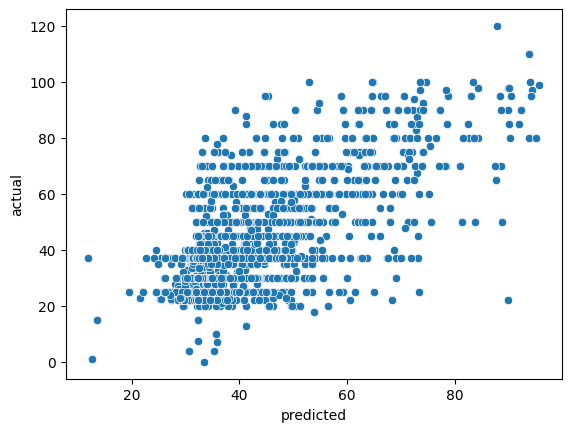

In [122]:
sns.scatterplot(data=act_vs_pred, x="predicted", y="actual")

In [115]:
A = X_val_R.squeeze()
A

A         C         D         E         F         G         H  \
0     0.076531  0.000000  0.069388  0.052041  0.039796  0.090816  0.012245   
1     0.059783  0.018116  0.063406  0.056159  0.038043  0.057971  0.039855   
2     0.088773  0.002611  0.086162  0.057441  0.031332  0.099217  0.023499   
3     0.069307  0.000000  0.108911  0.039604  0.039604  0.069307  0.019802   
4     0.131902  0.009202  0.058282  0.055215  0.018405  0.110429  0.009202   
...        ...       ...       ...       ...       ...       ...       ...   
1896  0.090909  0.022727  0.045455  0.022727  0.068182  0.000000  0.022727   
1897  0.069288  0.003745  0.052434  0.050562  0.054307  0.069288  0.018727   
1898  0.053381  0.007117  0.085409  0.090747  0.046263  0.062278  0.024911   
1899  0.096124  0.010853  0.062016  0.068217  0.048062  0.089922  0.031008   
1900  0.166197  0.016901  0.030986  0.056338  0.014085  0.092958  0.028169   

             I         K         L  ...     d27.1     d28.1     d29.1  \
0     0.062245  0.066327  0.054082  ...  0.032534  0.028335  0.032076   
1     0.052536  0.063406  0.097826  ...  0.032534  0.028335  0.032076   
2     0.057441  0.075718  0.065274  ...  0.032534  0.028335  0.032076   
3     0.084158  0.024752  0.089109  ...  0.032534  0.028335  0.032076   
4     0.036810  0.033742  0.101227  ...  0.032534  0.028335  0.032076   
...        ...       ...       ...  ...       ...       ...       ...   
1896  0.022727  0.045455  0.090909  ...  0.032534  0.028335  0.032076   
1897  0.056180  0.048689  0.084270  ...  0.032534  0.028335  0.032076   
1898  0.065836  0.078292  0.069395  ...  0.032534  0.028335  0.032076   
1899  0.040310  0.006202  0.105426  ...  0.032534  0.028335  0.032076   
1900  0.053521  0.028169  0.115493  ...  0.032534  0.028335  0.032076   

         d30.1  range  prob_vlow  prob_low  prob_med  prob_hig  prob_vhig  
0     0.032111      2   0.190886  0.192389  0.230148  0.195775   0.190801  
1     0.032111      1   0.184285  0.287583  0.181289  0.175848   0.170994  
2     0.032111      3   0.176345  0.194656  0.201335  0.258337   0.169327  
3     0.032111      3   0.188696  0.199135  0.208209  0.211156   0.192805  
4     0.032111      1   0.184657  0.219699  0.211168  0.201796   0.182681  
...        ...    ...        ...       ...       ...       ...        ...  
1896  0.032111      1   0.192804  0.231415  0.198381  0.189580   0.187822  
1897  0.032111      1   0.194570  0.210687  0.200208  0.190581   0.203953  
1898  0.032111      1   0.188227  0.221147  0.200004  0.199392   0.191230  
1899  0.032111      1   0.197448  0.255253  0.184199  0.192125   0.170975  
1900  0.032111      1   0.195012  0.260443  0.190861  0.185865   0.167818  

[1901 rows x 9967 columns]

In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(actual, predicted))
rms

12.831006883098992

In [26]:
auc_metric

[0.7821955797748933]

In [27]:
r2_metric

[0.4537683437684108]

In [28]:
r2_metric

[0.4537683437684108]

In [29]:
np.any(np.isnan(input_d))

False

In [30]:
np.all(np.isfinite(input_d))

True

In [31]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)

In [16]:
input_d["TEMPERATURE OPTIMUM"] = expanded_data["TEMPERATURE OPTIMUM"]

In [17]:
input_d

A         C         D         E         F         G         H  \
0     0.093190  0.017921  0.057348  0.046595  0.025090  0.089606  0.017921   
1     0.063091  0.009464  0.053628  0.063091  0.031546  0.104101  0.012618   
2     0.097983  0.014409  0.043228  0.072046  0.017291  0.100865  0.020173   
3     0.130312  0.028329  0.087819  0.062323  0.014164  0.107649  0.033994   
4     0.083333  0.017241  0.037356  0.074713  0.025862  0.123563  0.031609   
...        ...       ...       ...       ...       ...       ...       ...   
9560  0.108434  0.004016  0.040161  0.040161  0.012048  0.084337  0.040161   
9561  0.136364  0.005051  0.030303  0.010101  0.065657  0.085859  0.025253   
9562  0.116541  0.007519  0.041353  0.045113  0.030075  0.048872  0.000000   
9563  0.047855  0.013201  0.049505  0.052805  0.052805  0.072607  0.016502   
9564  0.064593  0.000000  0.074163  0.076555  0.028708  0.071770  0.011962   

             I         K         L  ...     d22.1     d23.1     d24.1  \
0     0.075269  0.078853  0.064516  ...  0.031867  0.033830  0.031876   
1     0.123028  0.069401  0.082019  ...  0.031556  0.033632  0.030897   
2     0.069164  0.066282  0.092219  ...  0.029863  0.033804  0.032413   
3     0.016997  0.005666  0.084986  ...  0.032300  0.033928  0.033032   
4     0.063218  0.060345  0.077586  ...  0.031993  0.033432  0.031316   
...        ...       ...       ...  ...       ...       ...       ...   
9560  0.036145  0.032129  0.156627  ...  0.032789  0.033764  0.030094   
9561  0.040404  0.005051  0.161616  ...  0.031456  0.033371  0.031253   
9562  0.071429  0.052632  0.097744  ...  0.030835  0.033921  0.031157   
9563  0.052805  0.037954  0.151815  ...  0.033141  0.031993  0.030978   
9564  0.081340  0.086124  0.100478  ...  0.032000  0.032405  0.034212   

         d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  \
0     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111   
1     0.031789  0.032282  0.032068  0.031340  0.032466  0.032929   
2     0.031012  0.032000  0.033222  0.030910  0.031784  0.033489   
3     0.030483  0.032307  0.031558  0.030267  0.032947  0.031946   
4     0.031943  0.029474  0.032667  0.033449  0.031992  0.034449   
...        ...       ...       ...       ...       ...       ...   
9560  0.029987  0.032062  0.031501  0.029819  0.031229  0.031287   
9561  0.031196  0.032865  0.027629  0.030695  0.029946  0.031352   
9562  0.030035  0.033989  0.034441  0.031213  0.032455  0.032272   
9563  0.034058  0.032746  0.031105  0.032739  0.032919  0.032320   
9564  0.033755  0.031406  0.032981  0.032251  0.031627  0.031377   

      TEMPERATURE OPTIMUM  
0                    35.0  
1                    83.0  
2                    80.0  
3                    80.0  
4                    80.0  
...                   ...  
9560                 22.0  
9561                 22.0  
9562                 22.0  
9563                 37.0  
9564                 22.0  

[9502 rows x 9970 columns]

In [18]:
input_d = input_d.reset_index()

In [19]:
input_d = input_d.drop("index", axis = 1)

In [20]:
input_d

A         C         D         E         F         G         H  \
0     0.093190  0.017921  0.057348  0.046595  0.025090  0.089606  0.017921   
1     0.063091  0.009464  0.053628  0.063091  0.031546  0.104101  0.012618   
2     0.097983  0.014409  0.043228  0.072046  0.017291  0.100865  0.020173   
3     0.130312  0.028329  0.087819  0.062323  0.014164  0.107649  0.033994   
4     0.083333  0.017241  0.037356  0.074713  0.025862  0.123563  0.031609   
...        ...       ...       ...       ...       ...       ...       ...   
9497  0.108434  0.004016  0.040161  0.040161  0.012048  0.084337  0.040161   
9498  0.136364  0.005051  0.030303  0.010101  0.065657  0.085859  0.025253   
9499  0.116541  0.007519  0.041353  0.045113  0.030075  0.048872  0.000000   
9500  0.047855  0.013201  0.049505  0.052805  0.052805  0.072607  0.016502   
9501  0.064593  0.000000  0.074163  0.076555  0.028708  0.071770  0.011962   

             I         K         L  ...     d22.1     d23.1     d24.1  \
0     0.075269  0.078853  0.064516  ...  0.031867  0.033830  0.031876   
1     0.123028  0.069401  0.082019  ...  0.031556  0.033632  0.030897   
2     0.069164  0.066282  0.092219  ...  0.029863  0.033804  0.032413   
3     0.016997  0.005666  0.084986  ...  0.032300  0.033928  0.033032   
4     0.063218  0.060345  0.077586  ...  0.031993  0.033432  0.031316   
...        ...       ...       ...  ...       ...       ...       ...   
9497  0.036145  0.032129  0.156627  ...  0.032789  0.033764  0.030094   
9498  0.040404  0.005051  0.161616  ...  0.031456  0.033371  0.031253   
9499  0.071429  0.052632  0.097744  ...  0.030835  0.033921  0.031157   
9500  0.052805  0.037954  0.151815  ...  0.033141  0.031993  0.030978   
9501  0.081340  0.086124  0.100478  ...  0.032000  0.032405  0.034212   

         d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  \
0     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111   
1     0.031789  0.032282  0.032068  0.031340  0.032466  0.032929   
2     0.031012  0.032000  0.033222  0.030910  0.031784  0.033489   
3     0.030483  0.032307  0.031558  0.030267  0.032947  0.031946   
4     0.031943  0.029474  0.032667  0.033449  0.031992  0.034449   
...        ...       ...       ...       ...       ...       ...   
9497  0.029987  0.032062  0.031501  0.029819  0.031229  0.031287   
9498  0.031196  0.032865  0.027629  0.030695  0.029946  0.031352   
9499  0.030035  0.033989  0.034441  0.031213  0.032455  0.032272   
9500  0.034058  0.032746  0.031105  0.032739  0.032919  0.032320   
9501  0.033755  0.031406  0.032981  0.032251  0.031627  0.031377   

      TEMPERATURE OPTIMUM  
0                    35.0  
1                    83.0  
2                    80.0  
3                    80.0  
4                    80.0  
...                   ...  
9497                 22.0  
9498                 22.0  
9499                 22.0  
9500                 37.0  
9501                 22.0  

[9502 rows x 9970 columns]

In [22]:
from verstack.stratified_continuous_split import scsplit

In [26]:
train, test = scsplit(input_d, stratify = input_d["TEMPERATURE OPTIMUM"],test_size = 0.3,
                                             train_size = 0.7, random_state = 6)
    
X_train = train.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
y_train = train["TEMPERATURE OPTIMUM"]
X_test = test.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
y_test = test["TEMPERATURE OPTIMUM"]
    


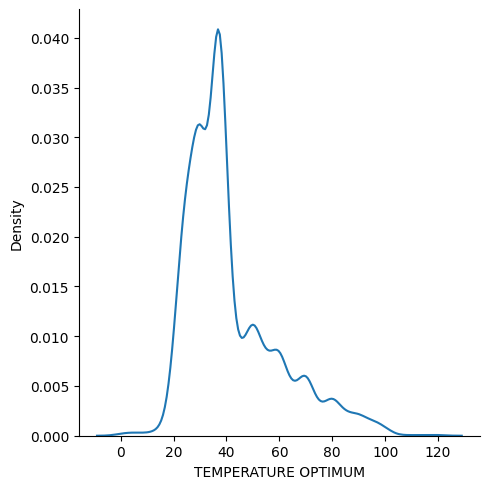

In [27]:
sns.displot(y_train, kind="kde")

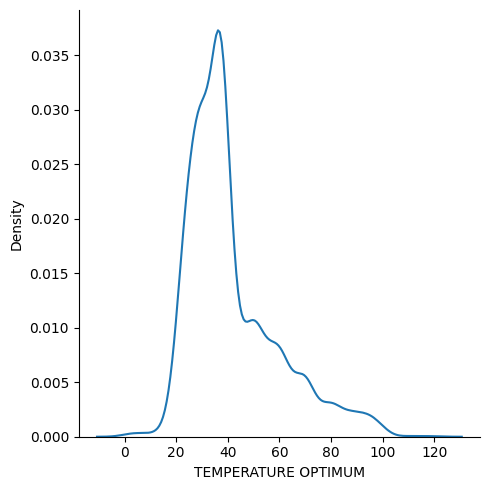

In [28]:
sns.displot(y_test, kind="kde")

In [ ]:
rs = resampler()
X_train["target"] = y_train
Y_classes = rs.fit(X_train, target="target", bins= 10)
Y =  y_train
smote = SMOTE(random_state=27)
final_X, final_Y = rs.resample(smote, X_train, Y_classes)
X_train_R = X_train.drop(columns=["target"], axis = 1)

In [27]:
final_X

A         C         D         E         F         G         H  \
0      0.077689  0.009960  0.081673  0.131474  0.067729  0.069721  0.013944   
1      0.149780  0.011013  0.037445  0.074890  0.052863  0.072687  0.011013   
2      0.051195  0.017065  0.061433  0.081911  0.020478  0.061433  0.051195   
3      0.074303  0.018576  0.102167  0.065015  0.034056  0.105263  0.024768   
4      0.062030  0.009398  0.084586  0.060150  0.045113  0.099624  0.041353   
...         ...       ...       ...       ...       ...       ...       ...   
81231  0.089198  0.008320  0.053163  0.113088  0.029273  0.078387  0.018018   
81232  0.099748  0.000437  0.064953  0.080925  0.040881  0.088587  0.031583   
81233  0.076271  0.002119  0.063559  0.088983  0.050847  0.074153  0.031780   
81234  0.044348  0.000000  0.032271  0.016965  0.037427  0.066781  0.013657   
81235  0.078359  0.025029  0.041373  0.083091  0.036642  0.067263  0.018493   

              I         K         L  ...     d21.1     d22.1     d23.1  \
0      0.041833  0.113546  0.075697  ...  0.032364  0.031254  0.032716   
1      0.061674  0.046256  0.094714  ...  0.032508  0.033214  0.033049   
2      0.068259  0.078498  0.098976  ...  0.034557  0.034160  0.033563   
3      0.037152  0.018576  0.065015  ...  0.034052  0.033112  0.031331   
4      0.046992  0.033835  0.067669  ...  0.033457  0.032809  0.032837   
...         ...       ...       ...  ...       ...       ...       ...   
81231  0.069580  0.078610  0.084927  ...  0.035137  0.032505  0.032651   
81232  0.066340  0.065353  0.084975  ...  0.032709  0.033467  0.034065   
81233  0.052966  0.074153  0.082627  ...  0.032825  0.031880  0.032888   
81234  0.071028  0.022177  0.099512  ...  0.032486  0.032241  0.032059   
81235  0.087906  0.070790  0.064081  ...  0.031218  0.030435  0.030807   

          d24.1     d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  
0      0.031874  0.031502  0.032174  0.033585  0.035256  0.031850  0.032035  
1      0.031989  0.032933  0.031887  0.032281  0.033376  0.031662  0.032646  
2      0.032027  0.030395  0.031183  0.032497  0.031261  0.030391  0.031397  
3      0.031016  0.032219  0.032880  0.032510  0.031622  0.032422  0.031406  
4      0.031856  0.031842  0.031643  0.031403  0.033747  0.031326  0.033345  
...         ...       ...       ...       ...       ...       ...       ...  
81231  0.032122  0.030992  0.032446  0.029587  0.031112  0.029935  0.029723  
81232  0.031690  0.033153  0.031845  0.031626  0.031675  0.030233  0.032791  
81233  0.031522  0.032567  0.031222  0.032867  0.031977  0.031898  0.031851  
81234  0.032975  0.032114  0.032367  0.031513  0.033344  0.032551  0.033654  
81235  0.031913  0.030310  0.030041  0.033323  0.032762  0.029953  0.031028  

[81236 rows x 9969 columns]

In [29]:
final_X_t, final_Y_t = X_test, y_test

model = model_lgb_r

model.fit(X_train,y_train,eval_set=[(X_train,y_train),(final_X_t,final_Y_t)],early_stopping_rounds=10)


[0]	validation_0-rmse:40.62517	validation_1-rmse:40.76898
[1]	validation_0-rmse:37.13171	validation_1-rmse:37.30439
[2]	validation_0-rmse:33.99288	validation_1-rmse:34.22074
[3]	validation_0-rmse:31.19531	validation_1-rmse:31.47062
[4]	validation_0-rmse:28.70496	validation_1-rmse:29.03656
[5]	validation_0-rmse:26.45931	validation_1-rmse:26.87383
[6]	validation_0-rmse:24.49414	validation_1-rmse:24.99189
[7]	validation_0-rmse:22.70806	validation_1-rmse:23.29723
[8]	validation_0-rmse:21.15113	validation_1-rmse:21.83747
[9]	validation_0-rmse:19.77025	validation_1-rmse:20.55547
[10]	validation_0-rmse:18.52514	validation_1-rmse:19.42321
[11]	validation_0-rmse:17.43704	validation_1-rmse:18.44534
[12]	validation_0-rmse:16.46548	validation_1-rmse:17.59289
[13]	validation_0-rmse:15.61546	validation_1-rmse:16.85856
[14]	validation_0-rmse:14.87778	validation_1-rmse:16.25470
[15]	validation_0-rmse:14.21748	validation_1-rmse:15.71415
[16]	validation_0-rmse:13.65474	validation_1-rmse:15.26987
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=['rmse'], feature_types=None, gamma=1, gpu_id=-1,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=2, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=-1,
             num_parallel_tree=10, predictor='auto', random_state=0, ...)

In [47]:
input_d_2 = input_d
data_2 = model.get_booster().get_score(importance_type='gain')
new = pd.DataFrame.from_dict(data_2,orient ='index')
new["features"] = new.index
new.sort_values(by=0,ascending=False,inplace=True)
new = new.iloc[0:8000,:]
new_f  = new["features"].to_list()
input_d_2 = input_d_2[new_f]
input_d_2

In [34]:
input_d_2["TEMPERATURE OPTIMUM"] = input_d["TEMPERATURE OPTIMUM"]

In [43]:
train, test = scsplit(input_d_2, stratify = input_d_2["TEMPERATURE OPTIMUM"],test_size = 0.2,
                                             train_size = 0.8, random_state = 6)
    
X_train = train.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
y_train = train["TEMPERATURE OPTIMUM"]
X_test = test.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
y_test = test["TEMPERATURE OPTIMUM"]
    
rs = resampler()
X_train["target"] = y_train
Y_classes = rs.fit(X_train, target="target", bins= 40)
Y =  y_train
smote = SMOTE(random_state=27)
final_X, final_Y = rs.resample(smote, X_train, Y_classes)
X_train_R = X_train.drop(columns=["target"], axis = 1)

INFO: Class 1 has been merged into Class 0 due to low number of samples
INFO: Class 3 has been merged into Class 2 due to low number of samples
INFO: Class 4 has been merged into Class 2 due to low number of samples
INFO: Class 5 has been merged into Class 2 due to low number of samples
INFO: Class 6 has been merged into Class 2 due to low number of samples
INFO: Class 7 has been merged into Class 2 due to low number of samples
INFO: Class 8 has been merged into Class 2 due to low number of samples
INFO: Class 10 has been merged into Class 9 due to low number of samples
INFO: Class 11 has been merged into Class 9 due to low number of samples
INFO: Class 12 has been merged into Class 9 due to low number of samples
INFO: Class 35 has been merged into Class 34 due to low number of samples
INFO: Class 37 has been merged into Class 36 due to low number of samples
INFO: Class 39 has been merged into Class 38 due to low number of samples
INFO: Class 43 has been merged into Class 42 due to low

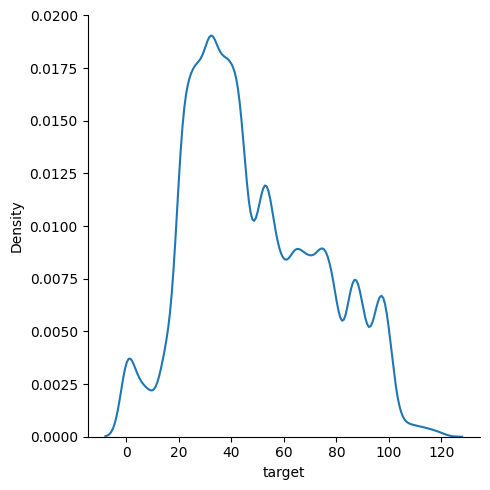

In [44]:
sns.displot(final_Y, kind="kde")

In [45]:
final_X

KARS160103         Q           C.4       DVF  EAH       Q.3  KRN  \
0        8.027888  0.021912  3.378939e-07  0.000000  0.0  0.018839  0.0   
1        7.348018  0.052863  4.047404e-07  0.000000  0.0  0.054724  0.0   
2        8.532423  0.027304  5.882775e-07  0.000000  0.0  0.024764  0.0   
3        6.953560  0.009288  6.723816e-07  0.000000  0.0  0.009104  0.0   
4        8.037594  0.022556  3.120486e-07  0.000000  0.0  0.020435  0.0   
...           ...       ...           ...       ...  ...       ...  ...   
81231    8.206148  0.014637  2.930982e-07  0.000224  0.0  0.012699  0.0   
81232    8.208458  0.020497  1.478111e-08  0.001795  0.0  0.018230  0.0   
81233    8.750000  0.012712  7.159556e-08  0.000000  0.0  0.010970  0.0   
81234    8.175028  0.057259  0.000000e+00  0.000019  0.0  0.076060  0.0   
81235    7.848802  0.018321  8.558954e-07  0.003553  0.0  0.017348  0.0   

       FUKS010109  PALJ810116         C  ...  lambda_hphob28       GNE  \
0        6.599462    0.969004  0.009960  ...       -0.004825  0.000000   
1        6.259978    0.960352  0.011013  ...       -0.000486  0.000000   
2        5.818020    0.966997  0.017065  ...        0.000721  0.000000   
3        6.288854    0.989628  0.018576  ...       -0.001736  0.000000   
4        5.674117    1.010132  0.009398  ...       -0.001459  0.001887   
...           ...         ...       ...  ...             ...       ...   
81231    6.432424    0.978582  0.008320  ...        0.007508  0.000000   
81232    6.229124    0.992532  0.000437  ...        0.001057  0.000000   
81233    6.099364    0.997331  0.002119  ...        0.001769  0.000000   
81234    5.500081    1.040305  0.000000  ...        0.000981  0.000000   
81235    6.084412    0.989032  0.025029  ...       -0.004539  0.000000   

            GGT  FFT  APK       NKS  LCG  ICH        YV       PLE  
0      0.002000  0.0  0.0  0.000000  0.0  0.0  0.001996  0.000000  
1      0.002212  0.0  0.0  0.000000  0.0  0.0  0.002208  0.000000  
2      0.003436  0.0  0.0  0.000000  0.0  0.0  0.003425  0.000000  
3      0.000000  0.0  0.0  0.000000  0.0  0.0  0.003106  0.000000  
4      0.000000  0.0  0.0  0.000000  0.0  0.0  0.001883  0.000000  
...         ...  ...  ...       ...  ...  ...       ...       ...  
81231  0.000000  0.0  0.0  0.000224  0.0  0.0  0.000000  0.003406  
81232  0.001795  0.0  0.0  0.000000  0.0  0.0  0.002230  0.000000  
81233  0.000000  0.0  0.0  0.000000  0.0  0.0  0.002123  0.000000  
81234  0.000000  0.0  0.0  0.000000  0.0  0.0  0.004495  0.000019  
81235  0.000000  0.0  0.0  0.003553  0.0  0.0  0.000000  0.000173  

[81236 rows x 4000 columns]

In [46]:
final_X_t, final_Y_t = X_test, y_test

model = model_lgb_r

model.fit(final_X,final_Y,eval_set=[(final_X,final_Y),(final_X_t,final_Y_t)],early_stopping_rounds=10)


[0]	validation_0-rmse:49.39495	validation_1-rmse:40.09858
[1]	validation_0-rmse:44.83122	validation_1-rmse:36.17660
[2]	validation_0-rmse:40.73823	validation_1-rmse:32.71106
[3]	validation_0-rmse:37.05330	validation_1-rmse:29.66315
[4]	validation_0-rmse:33.75142	validation_1-rmse:26.98539
[5]	validation_0-rmse:30.79583	validation_1-rmse:24.66273
[6]	validation_0-rmse:28.13245	validation_1-rmse:22.65538
[7]	validation_0-rmse:25.74668	validation_1-rmse:20.91396
[8]	validation_0-rmse:23.62261	validation_1-rmse:19.43567
[9]	validation_0-rmse:21.71608	validation_1-rmse:18.18609
[10]	validation_0-rmse:20.01200	validation_1-rmse:17.11046
[11]	validation_0-rmse:18.47709	validation_1-rmse:16.21916
[12]	validation_0-rmse:17.12057	validation_1-rmse:15.48370
[13]	validation_0-rmse:15.90660	validation_1-rmse:14.88127
[14]	validation_0-rmse:14.82268	validation_1-rmse:14.40991
[15]	validation_0-rmse:13.85349	validation_1-rmse:14.01702
[16]	validation_0-rmse:12.99700	validation_1-rmse:13.71461
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=['rmse'], feature_types=None, gamma=1, gpu_id=-1,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=300,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=-1,
             num_parallel_tree=10, predictor='auto', random_state=0, ...)

In [21]:
r2_metric = []
from verstack.stratified_continuous_split import scsplit
from imblearn.over_sampling import SMOTE
for i in range(1):
    train, test = scsplit(input_d, stratify = input_d["TEMPERATURE OPTIMUM"],test_size = 0.2,
                                             train_size = 0.8, random_state = 6)
    
    X_train = train.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
    y_train = train["TEMPERATURE OPTIMUM"]
    X_test = test.drop(columns = ["TEMPERATURE OPTIMUM"], axis = 1)
    y_test = test["TEMPERATURE OPTIMUM"]
    
    # rs = resampler()
    # X_train["target"] = y_train
    # Y_classes = rs.fit(X_train, target="target", bins= 100)
    # Y =  y_train
    # smote = SMOTE(random_state=27)
    # final_X, final_Y = rs.resample(smote, X_train, Y_classes)
    # X_train_R = X_train.drop(columns=["target"], axis = 1)

    #X_test["target"] = y_test
    #Y_classes = rs.fit(X_test, target="target", bins= 100)
    #Y =  y_test
    #smote = SMOTE(random_state=27)
    #final_X_t, final_Y_t = rs.resample(smote, X_test, Y_classes)
    #X_test_R = X_test.drop(columns=["target"], axis = 1)
    
    final_X_t, final_Y_t = X_test, y_test

    model = model_lgb_r

    model.fit(final_X,final_Y,eval_set=[(final_X,final_Y),(final_X_t,final_Y_t)],early_stopping_rounds=10)

    r2_scr = r2_score(final_Y_t,model.predict(final_X_t)) 
    r2_metric.append(r2_scr)

[0]	validation_0-rmse:40.64049	validation_1-rmse:40.61250
[1]	validation_0-rmse:37.14956	validation_1-rmse:37.16183
[2]	validation_0-rmse:34.01052	validation_1-rmse:34.05933
[3]	validation_0-rmse:31.21231	validation_1-rmse:31.32934
[4]	validation_0-rmse:28.70500	validation_1-rmse:28.89031
[5]	validation_0-rmse:26.47524	validation_1-rmse:26.71549
[6]	validation_0-rmse:24.48849	validation_1-rmse:24.80301
[7]	validation_0-rmse:22.70854	validation_1-rmse:23.10876
[8]	validation_0-rmse:21.13269	validation_1-rmse:21.60219
[9]	validation_0-rmse:19.74969	validation_1-rmse:20.32830
[10]	validation_0-rmse:18.51242	validation_1-rmse:19.20764
[11]	validation_0-rmse:17.43102	validation_1-rmse:18.22299
[12]	validation_0-rmse:16.46284	validation_1-rmse:17.36590
[13]	validation_0-rmse:15.62473	validation_1-rmse:16.64938
[14]	validation_0-rmse:14.87930	validation_1-rmse:16.01671
[15]	validation_0-rmse:14.24280	validation_1-rmse:15.50620
[16]	validation_0-rmse:13.66368	validation_1-rmse:15.05624
[17]	va

In [22]:
r2_metric

[0.5074848096373095]

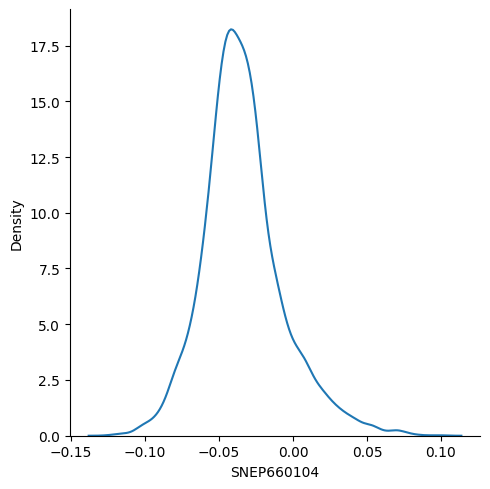

In [23]:
sns.displot(final_X["SNEP660104"], kind="kde")

In [24]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(final_X)

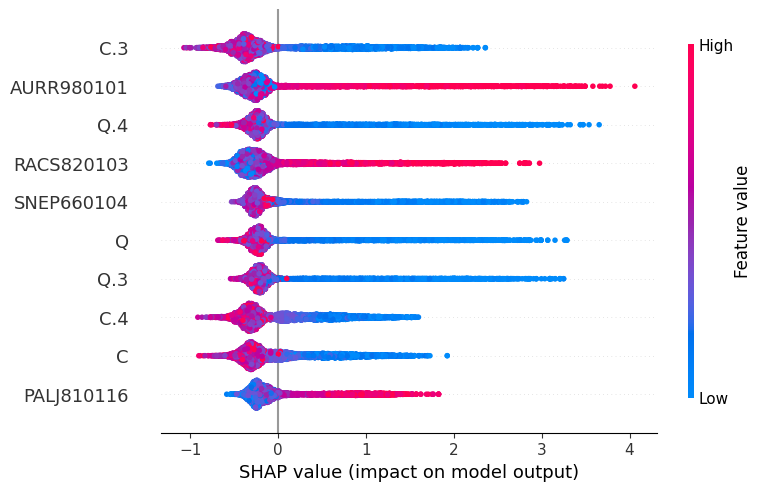

In [25]:
shap.summary_plot(shap_values, final_X, max_display = 10)